![img](http://drive.google.com/uc?export=view&id=1Gi4lNIANsWjxlvikM4h1Xein_PPwhHgM)
# **Introduction to K-means Clustering**

# Starting Off:

What is the difference between supervised learning and unsupervised learning.

## Agenda:
- Unsupervised Learning
- K-means Concepts
- Selecting the Right number of K
- Problems with K-Means
- K-Means Application

## Supervised Vs Unsupervised Learning.
In supervised learning, the system tries to learn from the previous examples that are given. (On the other hand, in unsupervised learning, the system attempts to find the patterns directly from the example given.) So if the dataset is labelled it comes under a supervised problem, it the dataset is unlabelled then it is an unsupervised problem.

![alt text](https://cdn-images-1.medium.com/max/800/1*AZMDyaifxGVdwTV-1BN7kA.png)

### Clustering
In clustering, the data is divided into several groups. In plain words, the aim is to segregate groups with similar traits and assign them into clusters.



![clustering](https://cdn-images-1.medium.com/max/800/1*58tBPk4oZqhZ-LUq-0Huow.jpeg)

## Clustering Use Cases:

Talk with a partner and come up with two problems wher you think clustering could be of some use.
    
https://dzone.com/articles/10-interesting-use-cases-for-the-k-means-algorithm

### Clustering: Types
Clustering can be broadly divided into two subgroups:

**Hard clustering**: in hard clustering, each data object or point either belongs to a cluster completely or not. For example in the Uber dataset, each location belongs to either one borough or the other.

**Soft clustering**: in soft clustering, a data point can belong to more than one cluster with some probability or likelihood value. For example, you could identify some locations as the border points belonging to two or more boroughs.

### Clustering Algorithms

**Connectivity-based clustering**: the main idea behind this clustering is that data points that are closer in the data space are more related (similar) than to data points farther away. The clusters are formed by connecting data points according to their distance. At different distances, different clusters will form and can be represented using a dendrogram, which gives away why they are also commonly called "hierarchical clustering". These methods do not produce a unique partitioning of the dataset, rather a hierarchy from which the user still needs to choose appropriate clusters by choosing the level where they want to cluster. They are also not very robust towards outliers, which might show up as additional clusters or even cause other clusters to merge.

**Centroid-based clustering**: in this type of clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. This is an iterative clustering algorithms in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. k-means is a centroid based clustering, and will you see this topic more in detail later on in the tutorial.

**Distribution-based clustering**: this clustering is very closely related to statistics: distributional modeling. Clustering is based on the notion of how probable is it for a data point to belong to a certain distribution, such as the Gaussian distribution, for example. Data points in a cluster belong to the same distribution. These models have a strong theoritical foundation, however they often suffer from overfitting. Gaussian mixture models, using the expectation-maximization algorithm is a famous distribution based clustering method.

**Density-based** methods search the data space for areas of varied density of data points. Clusters are defined as areas of higher density within the data space compared to other regions. Data points in the sparse areas are usually considered to be noise and/or border points. The drawback with these methods is that they expect some kind of density guide or parameters to detect cluster borders. DBSCAN and OPTICS are some prominent density based clustering.


https://medium.com/predict/three-popular-clustering-methods-and-when-to-use-each-4227c80ba2b6

### More Unsupervised Techniques:
- Principal Component Analysis (PCA)
- Anomaly detection
- Autoencoders
- Deep Belief Nets
- Hebbian Learning
- Generative Adversarial Networks(GANs)
- Self-Organizing maps

#### Import libraries and download dataset


In [1]:

# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

#### Data for later in the exercise

In [2]:
url = 'https://raw.githubusercontent.com/mubaris/friendly-fortnight/master/xclara.csv'
test = pd.read_csv(url)

## Clustering!   Finding **GROUPS**

How many groups do you see?

![img](http://drive.google.com/uc?export=view&id=1am-0t4grAQueYP9IMmgV0dC4MHWTKd6h)


##  K-Means approach

Takes K number of centroids or data points in its account initially.
After choosing the centroids, (say C1 and C2) the data points (coordinates here) are assigned to any of the Clusters (let’s take centroids = clusters for the time being) depending upon the distance between them and the centroids.

For measuring the distances, you take the following distance measurement function (also termed as similarity measurement function):

$$d = |x2 – x1| + | y2 – y1| + |z2 – z1|$$

This is also known as the Taxicab distance or Manhattan distance, where d is distance measurement between two objects, (x1,y1,z1) and (x2,y2,z2) are the X, Y and Z coordinates of any two objects taken for distance measurement.

Feel free to check out other distance measurement functions like [Euclidean Distance, Cosine Distance etc](https://arxiv.org/ftp/arxiv/papers/1405/1405.7471.pdf).

The algorithm will continue updating cluster centroids (i.e the coordinates) until they cannot be updated anymore (more on when it cannot be updated later). The update takes place in the following manner:

![centroid_update](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526380253/CodeCogsEqn_v5le8c.png)

(where n = number of objects belonging to that particular cluster)


The algorithm no longer updates the centroids when there is no change in the current cluster formation.


### Observe the following four examples with a sample dataset:

#### Example 1

![left](http://drive.google.com/uc?export=view&id=1rQsgwmbeKsf9lgAv4onHJQMNqYcXZ1cr)

#### Method 2

![right](http://drive.google.com/uc?export=view&id=1duSB73v8ugD5liZyn5dUeSOgwvAbdgui)

#### Method 3

![top](http://drive.google.com/uc?export=view&id=1ZRa7oAskuwSQxLqEyYQc8FZWjERnQx_e)

#### Method 4

![bottom](http://drive.google.com/uc?export=view&id=1TE62xmACOaux75AlzivcP7tSzR86n8ZE)

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

### Review Data

We will now use the dataset we uploaded earlier:

`url = 'https://raw.githubusercontent.com/mubaris/friendly-fortnight/master/xclara.csv'`

`test = pd.read_csv(url)`

- This is a sample dataset. 
- Let us assume the data is already scaled.

#### EDA of variables

In [4]:
test.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [3]:
test.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


#### Introduction of `Kmeans`

In [5]:
model = KMeans(n_clusters=4).fit(test)

In [6]:
model.cluster_centers_

array([[ 69.92418447, -10.11964119],
       [ 31.78831061,  59.67227949],
       [  9.43391214,  10.63898036],
       [ 48.13340973,  59.66325939]])

## Note! 
#### Do you have different cluster_centers?
*Good!*

We saw in the demo that the algorithm is sensitive to starting points.

We can use the additional argument `random_state` to set the seed and have a repeatable results

In [7]:
model_setseed = KMeans(n_clusters=4, random_state=10).fit(test)
model_setseed.cluster_centers_

array([[ 48.09974943,  59.34612869],
       [ 69.92418447, -10.11964119],
       [  9.45577774,  10.66209744],
       [ 31.77135822,  60.10656849]])

#### **Exercise**: 
- Try running `Kmeans` with different number of `n_clusters`, k=2 through k=7
- Check the `cluster_centers_` 
- Without running any more functions, which number of K is the best?

In [8]:
#Practice code goes here
model5 = KMeans(n_clusters=5, random_state=8).fit(test)
model5.cluster_centers_



array([[  9.43391214,  10.63898036],
       [ 70.29033874, -18.60014487],
       [ 48.13340973,  59.66325939],
       [ 69.57161944,  -1.95387786],
       [ 31.78831061,  59.67227949]])

##  Determining Optimal Number of Clusters


A variety of measures have been proposed in the literature for evaluating clustering results. The term clustering validation is used to design the procedure of evaluating the results of a clustering algorithm. There are more than thirty indices and methods for identifying the optimal number of clusters so I’ll just focus on a two. 

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**



###  Elbow Method
Recall that, the basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.

The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

The optimal number of clusters can be defined as follow:

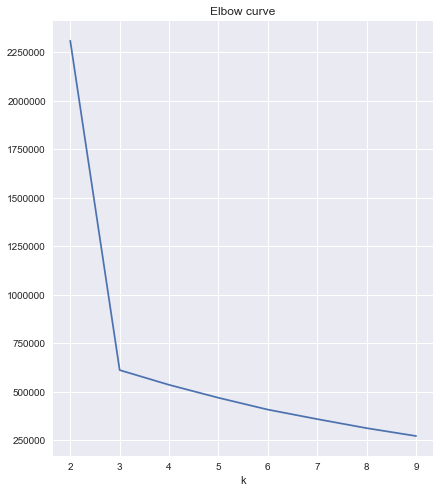

In [9]:
# Specifying the dataset and initializing variables
X = test
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)


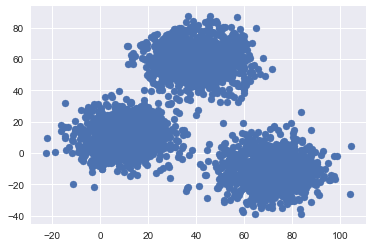

In [10]:
plt.scatter(test.V1, test.V2)

### Silhouette coefficient

The average silhouette approach we’ll be described comprehensively in the chapter [cluster validation statistics](https://www.datanovia.com/en/lessons/cluster-validation-statistics-must-know-methods/).

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k

In [11]:
# Generate silhouette coefficient for each k
X = test
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

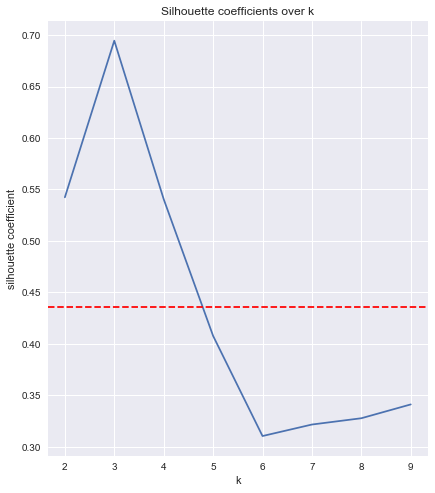

In [12]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

##  **Assumptions** and **challenges** of K-means

http://varianceexplained.org/r/kmeans-free-lunch/

- Demonstrate the ideal K-means dataset
- Show three scenarios where K-means struggles

### Messy Clusters

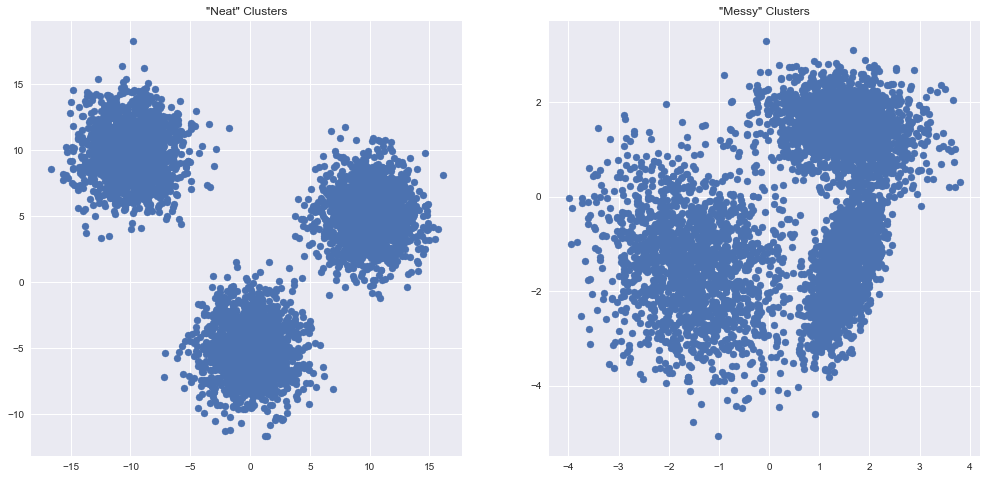

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

#Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, _ = datasets.make_blobs(n_samples=5000,
                                centers=centers_neat,
                                cluster_std=2,
                                random_state=2)

x_messy, _ = datasets.make_classification(n_samples=5000,
                                          n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          shuffle=False,
                                          random_state=301)
#Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])
plt.subplot(122, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], x_messy[:,1])


In [ ]:
from sklearn.cluster import KMeans

#Predict K-Means cluster membership
km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='"Neat" K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap=cmap)
plt.subplot(122, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)

### Non-Spherical Data

How do you think the k-means algorithm will handle non-spherical clusters like these?

![nonspherical](http://varianceexplained.org/figs/2015-01-16-kmeans-free-lunch/non_spherical-1.png)

Maybe this isn’t what you were expecting- but it’s a perfectly reasonable way to construct clusters. Looking at this image, we humans immediately recognize two natural groups of points- there’s no mistaking them. 

![clusteringspherical](http://varianceexplained.org/figs/2015-01-16-kmeans-free-lunch/plot_kmeans-1.png)

K-means was trying to fit a square peg in a round hole- trying to find nice centers with neat spheres around them- and it failed.

You might say “That’s not a fair example… no clustering method could correctly find clusters that are that weird.” Not true! Try single linkage hierachical clustering, which we will learn about later.

### Unevenly sized clusters
What if the clusters have an uneven number of points- does that also break k-means clustering? Well, consider this set of clusters, of sizes 20, 100, 500.:

![unevenclusters](http://varianceexplained.org/figs/2015-01-16-kmeans-free-lunch/different_sizes-1.png)

This looks like k-means could probably find those clusters, right? Everything seems to be generated into neat and tidy groups. So let’s try k-means:

![clustering_unevens](http://varianceexplained.org/figs/2015-01-16-kmeans-free-lunch/different_sizes_kmeans-1.png)

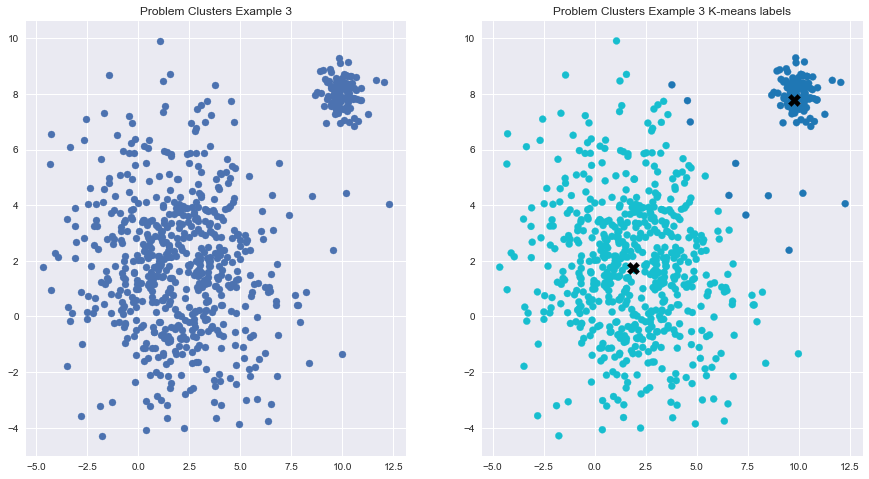

In [15]:
# Problem Scenario 3

# Third toy data set
blob1, y1 = datasets.make_blobs(n_samples=100,
                               centers=[(10,8)],
                               cluster_std=0.5,
                               random_state=2)

blob2, y2 = datasets.make_blobs(n_samples=600,
                               centers=[(2,2)],
                               cluster_std=2.5,
                               random_state=2)


unbal = np.vstack([blob1, blob2])
y1[y1 == 0] = 0
y2[y2 == 0] = 1
labs = np.concatenate([y1, y2])

#Predict K-Means cluster membership
km_unbal = KMeans(n_clusters=2, random_state=2).fit(unbal)
km_unbal_preds = KMeans(n_clusters=2, random_state=2).fit_predict(unbal)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Problem Clusters Example 3')
plt.scatter(unbal[:,0], unbal[:,1])
plt.subplot(122, title='Problem Clusters Example 3 K-means labels')
plt.scatter(unbal[:,0], unbal[:,1], c=km_unbal_preds, cmap=cmap)
plt.scatter(km_unbal.cluster_centers_[:,0], km_unbal.cluster_centers_[:,1], marker='X', s=150, c='black')

## Application
### K-means on larger dataset

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`
the link for the dataset can be found here: https://raw.githubusercontent.com/aapeebles/kmeans_flatiron/master/Kmeans%20lesson/Wine.csv


Instructions:
- First, remove customer_segment from the dataset

In [16]:
# Work on problem here:
url = 'https://raw.githubusercontent.com/aapeebles/kmeans_flatiron/master/Kmeans%20lesson/Wine.csv'
wine = pd.read_csv(url)


In [17]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [18]:
features =  wine.drop(columns=['Customer_Segment'])
segs = wine.Customer_Segment

In [19]:
features.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# make sure to scale data

We want to try and get an idea of how many different segments we might want, so we are going to start by plotting our data. 


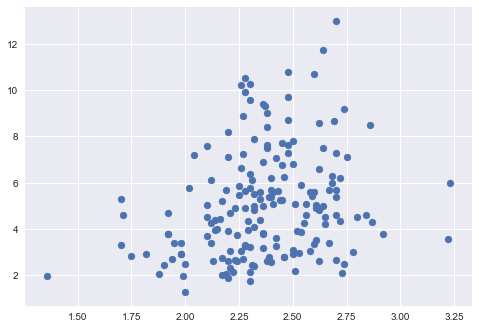

In [21]:
# select two features to create  a scatterplot of the wines 

plt.scatter(wine.Ash, wine.Color_Intensity)

Fit a K-means model and use a different evaluations of the clusters to decide the optimum number of clusters.

## Elbow Method

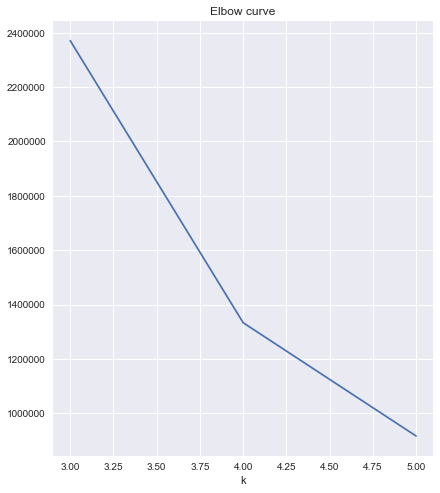

In [22]:
# Specifying the dataset and initializing variables
X = wine
distorsions = []

# Calculate SSE for different K
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state = 10)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(3, 6), distorsions)
plt.grid(True)

## Silhouette Method

In [24]:
# Generate silhouette coefficient for each k
X = features
silhouette_plot = []
for k in range(3, 6):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

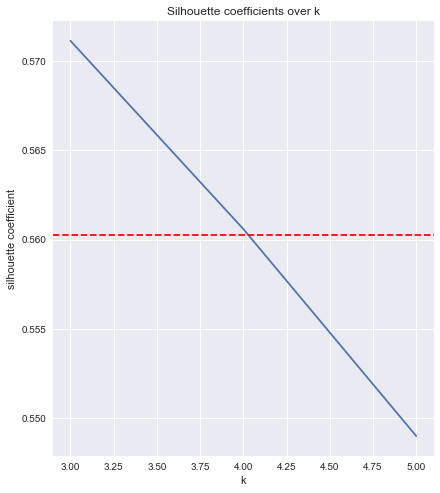

In [25]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(3, 6), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

### What do you think is the ideal number of clusters to use? How did you choose that number?

Now that you have the ideal number of clusters, let's refit our model and assign the oberservations to classes. 

In [33]:
kmeans = KMeans(n_clusters=7, random_state = 10)

cluster_labels = kmeans.fit_predict(wine)


In [29]:
cluster_labels

array([3, 0, 3, ..., 5, 2, 2], dtype=int32)

Now let's visualize those classes.

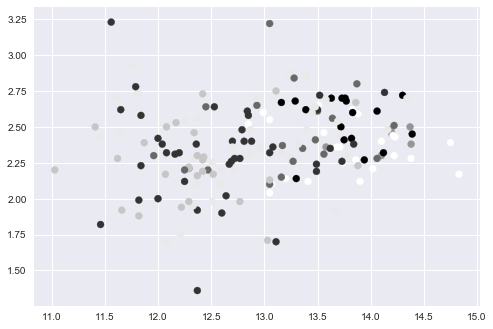

In [36]:
plt.scatter(wine.Alcohol, wine.Ash, c=cluster_labels)

## 3-D graphing example

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()